<a href="https://colab.research.google.com/github/sau-rabh999/Deep-Learning/blob/main/LSTM_implementation_for_AirPassenger_data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Importing dataset

In [ ]:
df = pd.read_csv('AirPassengers.csv', usecols=[1])
df.head()

,#Passengers
0,112
1,118
2,132
3,129
4,121


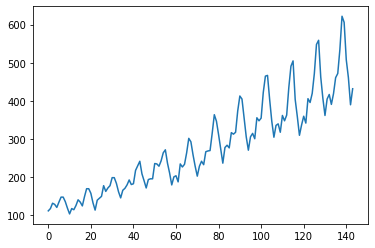

In [ ]:
plt.plot(df)

Convert pandas dataframe to numpy array

In [ ]:
ds = df.values
ds = ds.astype('float32')    #convert values to float

Normalization

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
ds = scaler.fit_transform(ds)
len(ds)

144

Splitting into training and test data

In [ ]:
train_size = int(len(ds) * 0.7)
test_size = len(ds) - train_size
train, test = ds[0:train_size,:], ds[train_size:len(ds),:]

In [ ]:
len(train)

100

In [ ]:
len(test)

44

Converting data into sequences

In [ ]:
#function to reshape input data into a sequence

def to_seq(ds, seq_size=1):
  x, y  = [],[]
  for i in range(len(ds)-seq_size-1):
      win = ds[i:(i+seq_size), 0]
      x.append(win)
      y.append(ds[i+seq_size, 0])
        
  return np.array(x),np.array(y)

In [ ]:
seq_size = 10          # Number of time steps to look back 

In [ ]:
x_train, y_train = to_seq(train, seq_size)
x_test, y_test = to_seq(test, seq_size)

In [ ]:
print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))

Shape of training set: (89, 10)
Shape of test set: (33, 10)


In [ ]:
x_train

array([[0.01544401, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
        0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753],
       [0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557,
        0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ],
       [0.05405405, 0.04826255, 0.03281853, 0.05984557, 0.08494207,
        0.08494207, 0.06177607, 0.02895753, 0.        , 0.02702703],
       [0.04826255, 0.03281853, 0.05984557, 0.08494207, 0.08494207,
        0.06177607, 0.02895753, 0.        , 0.02702703, 0.02123553],
       [0.03281853, 0.05984557, 0.08494207, 0.08494207, 0.06177607,
        0.02895753, 0.        , 0.02702703, 0.02123553, 0.04247104],
       [0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753,
        0.        , 0.02702703, 0.02123553, 0.04247104, 0.07142857],
       [0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ,
        0.02702703, 0.02123553, 0.04247104, 0.07142857, 0.05984557],
       [0.08494207, 0.06177607, 0.0289575

In [40]:
x_train.shape

(89, 1, 10)

In [ ]:
x_test

array([[0.484556  , 0.6138996 , 0.6969112 , 0.70077217, 0.57915056,
        0.46911195, 0.38803086, 0.44787642, 0.45559844, 0.4131274 ],
       [0.6138996 , 0.6969112 , 0.70077217, 0.57915056, 0.46911195,
        0.38803086, 0.44787642, 0.45559844, 0.4131274 , 0.4980695 ],
       [0.6969112 , 0.70077217, 0.57915056, 0.46911195, 0.38803086,
        0.44787642, 0.45559844, 0.4131274 , 0.4980695 , 0.47104248],
       [0.70077217, 0.57915056, 0.46911195, 0.38803086, 0.44787642,
        0.45559844, 0.4131274 , 0.4980695 , 0.47104248, 0.49999997],
       [0.57915056, 0.46911195, 0.38803086, 0.44787642, 0.45559844,
        0.4131274 , 0.4980695 , 0.47104248, 0.49999997, 0.6389961 ],
       [0.46911195, 0.38803086, 0.44787642, 0.45559844, 0.4131274 ,
        0.4980695 , 0.47104248, 0.49999997, 0.6389961 , 0.7471043 ],
       [0.38803086, 0.44787642, 0.45559844, 0.4131274 , 0.4980695 ,
        0.47104248, 0.49999997, 0.6389961 , 0.7471043 , 0.7741313 ],
       [0.44787642, 0.45559844, 0.4131274

In [41]:
x_test.shape

(33, 1, 10)

**Building model** : Stacked LSTM with 1 hidden dense layer

In [ ]:
#reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(None, seq_size)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, None, 50)          12200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1632      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 34,065
Trainable params: 34,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), verbose=2, epochs=100)

Epoch 1/100
3/3 - 24s - loss: 0.0707 - val_loss: 0.3866
Epoch 2/100
3/3 - 0s - loss: 0.0578 - val_loss: 0.3478
Epoch 3/100
3/3 - 0s - loss: 0.0471 - val_loss: 0.3092
Epoch 4/100
3/3 - 0s - loss: 0.0370 - val_loss: 0.2708
Epoch 5/100
3/3 - 0s - loss: 0.0290 - val_loss: 0.2323
Epoch 6/100
3/3 - 0s - loss: 0.0224 - val_loss: 0.1945
Epoch 7/100
3/3 - 0s - loss: 0.0180 - val_loss: 0.1587
Epoch 8/100
3/3 - 0s - loss: 0.0151 - val_loss: 0.1273
Epoch 9/100
3/3 - 0s - loss: 0.0140 - val_loss: 0.1024
Epoch 10/100
3/3 - 0s - loss: 0.0150 - val_loss: 0.0838
Epoch 11/100
3/3 - 0s - loss: 0.0153 - val_loss: 0.0754
Epoch 12/100
3/3 - 0s - loss: 0.0149 - val_loss: 0.0744
Epoch 13/100
3/3 - 0s - loss: 0.0142 - val_loss: 0.0786
Epoch 14/100
3/3 - 0s - loss: 0.0129 - val_loss: 0.0823
Epoch 15/100
3/3 - 0s - loss: 0.0120 - val_loss: 0.0843
Epoch 16/100
3/3 - 0s - loss: 0.0113 - val_loss: 0.0826
Epoch 17/100
3/3 - 0s - loss: 0.0108 - val_loss: 0.0779
Epoch 18/100
3/3 - 0s - loss: 0.0102 - val_loss: 0.0688


Make Predictions

In [ ]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

Inverting predictions back to prescaled values (to compare with original input values)

In [ ]:
train_pred = scaler.inverse_transform(train_pred)
y_train = scaler.inverse_transform([y_train])
test_pred = scaler.inverse_transform(test_pred)
y_test = scaler.inverse_transform([y_test])

Plotting the results

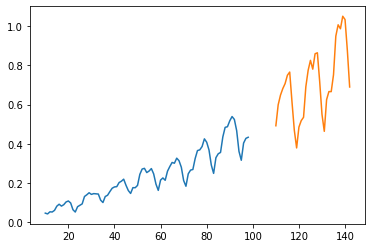

In [ ]:
# shift train predictions for plotting
# we must shift the predictions so that they align on the x-axis with the original dataset. 
train_predPlot = np.empty_like(ds)
train_predPlot[:, :] = np.nan
train_predPlot[seq_size:len(train_pred)+seq_size, :] = train_pred

# shift test predictions for plotting
test_predPlot = np.empty_like(ds)
test_predPlot[:, :] = np.nan
test_predPlot[len(train_pred)+(seq_size*2)+1:len(ds)-1, :] = test_pred

# plot predictions
plt.plot(train_predPlot)
plt.plot(test_predPlot)
plt.xlabel('')
plt.show()